In [3]:
pip install --upgrade ibm-watson opencv-python
#classifying images using watsoN VR and pyhton

Requirement already up-to-date: ibm-watson in c:\users\vishesh\anaconda3\lib\site-packages (4.3.0)
Requirement already up-to-date: opencv-python in c:\users\vishesh\anaconda3\lib\site-packages (4.2.0.34)
Note: you may need to restart the kernel to use updated packages.


In [1]:
#displaying / plotting image in jupyter notebook
import cv2
import urllib.request
from matplotlib import pyplot as plt
from pylab import rcParams
def show_img(img_url , size = (10,10)):
    #download an image from a url
    urllib.request.urlretrieve(img_url, "image.jpg")#download file as "image.jpg"
    image = cv2.imread("image.jpg")
    #if image is color image ,then correct the color coding from BGR to RGB
    if len(image.shape)==3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    rcParams['figure.figsize'] = size[0] , size[1] #setting image display size
    plt.axis("off")
    plt.imshow(image , cmap="Greys_r")
    plt.show()

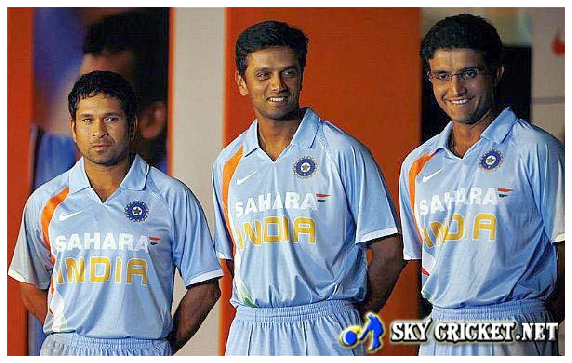

In [6]:
img_url = "https://4.bp.blogspot.com/-LBrrWw-IAMY/U1yXxSvlLxI/AAAAAAAABKo/0CtllSKXD0Y/s1600/sachin-dravid-ganguly-casual-labourers.jpg"
show_img(img_url)

In [7]:
#Classifying the image using IBM watson API
#You need API KEY for that 
my_apikey = 'R0_bO0-UYFW6KSmCkuWc5uzsFmZtLAswDFfPv6vKbUP4'

In [8]:
#Now intialize your own visual recognition service instance
from ibm_watson import VisualRecognitionV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
authenticator = IAMAuthenticator(my_apikey)

visual_rec = VisualRecognitionV3('2018-03-19' ,authenticator = authenticator)


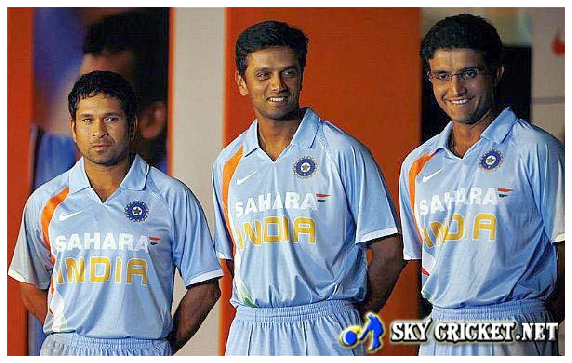

{
  "images": [
    {
      "classifiers": [
        {
          "classifier_id": "default",
          "name": "default",
          "classes": [
            {
              "class": "competition",
              "score": 0.573,
              "type_hierarchy": "/person/contestant/competition"
            },
            {
              "class": "contestant",
              "score": 0.573
            },
            {
              "class": "person",
              "score": 0.768
            },
            {
              "class": "policeman",
              "score": 0.544,
              "type_hierarchy": "/person/policeman"
            },
            {
              "class": "sport",
              "score": 0.544
            },
            {
              "class": "blue color",
              "score": 0.93
            },
            {
              "class": "ultramarine color",
              "score": 0.578
            }
          ]
        }
      ],
      "source_url": "https://4.bp.blogspot.c

In [23]:
#Let's call the classify method from the Watson Image Recognition API to see what objects our Image Recognition Model can identify from this picture
import json
img_url = "https://4.bp.blogspot.com/-LBrrWw-IAMY/U1yXxSvlLxI/AAAAAAAABKo/0CtllSKXD0Y/s1600/sachin-dravid-ganguly-casual-labourers.jpg"
# keeping the threshold  = 0.6 ,  that means classes with confidence score with 0.5 or greater will be shown 
classes = visual_rec.classify(url=img_url, threshold='0.54', classifier_ids='default').get_result()
show_img(img_url)
print(json.dumps(classes, indent=2))


In [18]:
#converting the output in dataframe
from pandas.io.json import json_normalize
def get_df(url, apikey=my_apikey):
    json_result = visual_rec.classify(url=url , threshold = '0.55', classifier_ids='default').get_result()
    json_classes = json_result['images'][0]['classifiers'][0]['classes']
    df = json_normalize(json_classes).sort_values('score', ascending=False).reset_index(drop= True)
    return df

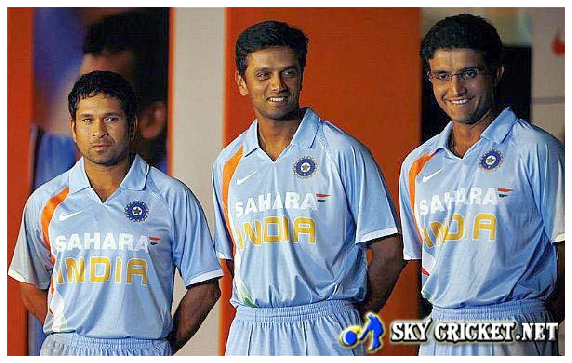

,class,score,type_hierarchy
0,blue color,0.930,NaN
1,person,0.768,NaN
2,ultramarine color,0.578,NaN
3,competition,0.573,/person/contestant/competition
4,contestant,0.573,NaN


In [19]:
url = "https://4.bp.blogspot.com/-LBrrWw-IAMY/U1yXxSvlLxI/AAAAAAAABKo/0CtllSKXD0Y/s1600/sachin-dravid-ganguly-casual-labourers.jpg"
show_img(url)
get_df(url)